In [1]:
import pandas as pd
import numpy as np


# Q1

## a)

In [2]:
mayer = pd.read_csv("mayer.csv").drop(columns=["Unnamed: 0", "Equation"])

In [3]:
mayer

,Y,X1,X2,X3,Group
0,-13.166667,-1,0.8836,-0.4682,I
1,-13.133333,-1,0.9996,-0.0282,I
2,-13.200000,-1,0.9899,0.1421,I
3,-14.250000,-1,0.2221,0.9750,III
4,-14.700000,-1,0.0006,1.0000,III
5,-13.016667,-1,0.9308,-0.3654,I
6,-14.516667,-1,0.0602,0.9982,III
7,-14.950000,-1,-0.1570,0.9876,II
8,-13.083333,-1,0.9097,-0.4152,I
9,-13.033333,-1,1.0000,0.0055,I


In [47]:
mayer_groupped = mayer.groupby(by="Group").mean()

In [48]:
mayer_groupped

,Y,X1,X2,X3
Group,,,,
I,-13.125926,-1.0,0.944300,-0.088133
II,-15.587037,-1.0,-0.682267,0.193811
III,-14.170370,-1.0,0.310856,0.884989


In [49]:
Y = mayer_groupped["Y"].to_numpy()
X = mayer_groupped[["X1", "X2", "X3"]].to_numpy()

In [33]:
X

array([[-9.    ,  8.4987, -0.7932],
       [-9.    , -6.1404,  1.7443],
       [-9.    ,  2.7977,  7.9649]])

In [34]:
Y

array([-118.13333333, -140.28333333, -127.53333333])

In [50]:
np.linalg.solve(X, Y)

array([14.54719339,  1.49580457, -0.09961272])

In [51]:
mayer_soln = np.linalg.solve(X, Y)

In [52]:
mayer_soln

array([14.54719339,  1.49580457, -0.09961272])

## b)

In [38]:
self_group = mayer.copy(deep=True)

In [44]:
sample_list = self_group["Group"].to_numpy()

self_group["Group"] = np.random.choice(
    sample_list, size=sample_list.size, replace=False)

In [45]:
mayer_self_groupped = self_group.groupby(by="Group").sum()
Y = mayer_self_groupped["Y"].to_numpy()
X = mayer_self_groupped[["X1", "X2", "X3"]].to_numpy()
our_soln = np.linalg.solve(X, Y)

In [46]:
our_soln

array([14.62969427,  1.60547464,  0.08680104])

## c)

In [53]:
X = mayer[["X1", "X2", "X3"]].to_numpy()
Y = mayer["Y"].to_numpy()

In [54]:
coefficients, residuals, rank, singular_vals = np.linalg.lstsq(X, Y, rcond=None)

In [55]:
coefficients

array([14.55824555,  1.50579501, -0.07192118])

## d)

In [105]:
np.linalg.norm(coefficients - mayer_soln)

0.031444875443026814

In [106]:
np.linalg.norm(coefficients - our_soln)

0.27570266443297675

## e)

In [56]:
np.linalg.pinv(X.T @ X) @ X.T @ Y

array([14.55824555,  1.50579501, -0.07192118])

# Q2

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
galton = pd.read_csv("galton.csv")

In [60]:
galton

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...,...
929,930,203,62.0,66.0,66.64,3,1,male,64.0
930,931,203,62.0,66.0,66.64,3,2,female,62.0
931,932,203,62.0,66.0,66.64,3,3,female,61.0
932,933,204,62.5,63.0,65.27,2,1,male,66.5


## a)

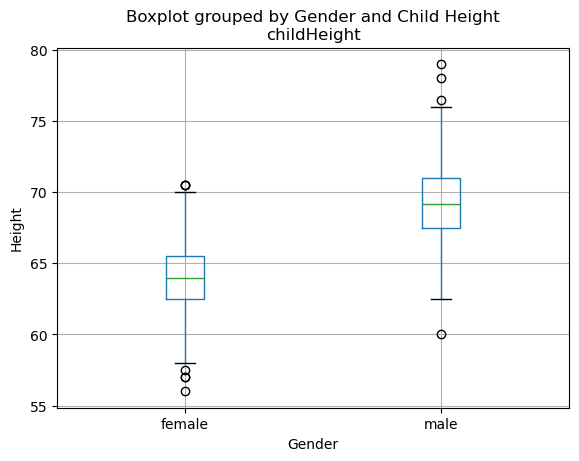

In [61]:
galton.boxplot(column="childHeight", by="gender")
plt.suptitle("Boxplot grouped by Gender and Child Height")
plt.ylabel("Height")
plt.xlabel("Gender")
plt.show()

/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


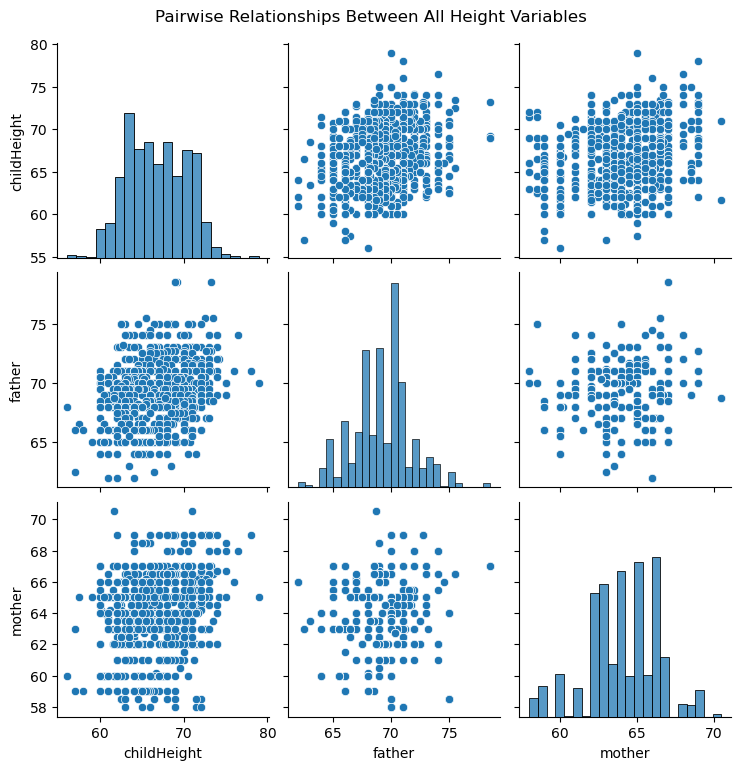

In [62]:
sns.pairplot(galton[["childHeight", "father", "mother"]])
plt.suptitle('Pairwise Relationships Between All Height Variables', y=1.02)
plt.show()

In [128]:
galton[["mother", "father", "childHeight"]].corr()

,mother,father,childHeight
mother,1.000000,0.060366,0.201322
father,0.060366,1.000000,0.266039
childHeight,0.201322,0.266039,1.000000


## b)

In [68]:
intercept = np.ones_like(galton[["mother"]].to_numpy())

In [69]:
X_raw = galton[["mother", "father"]].to_numpy()

In [70]:
X = np.hstack((intercept, X_raw))

In [71]:
coefficients, residuals, rank, singular_vals = np.linalg.lstsq(
    X, galton["childHeight"].to_numpy(), rcond=None)

In [72]:
coefficients

array([22.64327971,  0.29050997,  0.36828233])

## c)

In [74]:
galton["gender_num"] = galton["gender"].map({"male": 1, "female": 0})

In [75]:
galton

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight,gender_num
0,1,001,78.5,67.0,75.43,4,1,male,73.2,1
1,2,001,78.5,67.0,75.43,4,2,female,69.2,0
2,3,001,78.5,67.0,75.43,4,3,female,69.0,0
3,4,001,78.5,67.0,75.43,4,4,female,69.0,0
4,5,002,75.5,66.5,73.66,4,1,male,73.5,1
...,...,...,...,...,...,...,...,...,...,...
929,930,203,62.0,66.0,66.64,3,1,male,64.0,1
930,931,203,62.0,66.0,66.64,3,2,female,62.0,0
931,932,203,62.0,66.0,66.64,3,3,female,61.0,0
932,933,204,62.5,63.0,65.27,2,1,male,66.5,1


In [76]:
X_raw = galton[["mother", "father", "gender_num"]].to_numpy()
X = np.hstack((intercept, X_raw))
coefficients, residuals, _, _ = np.linalg.lstsq(
    X, galton["childHeight"].to_numpy(), rcond=None)

In [77]:
coefficients

array([16.5212399 ,  0.31761007,  0.39284333,  5.21498935])